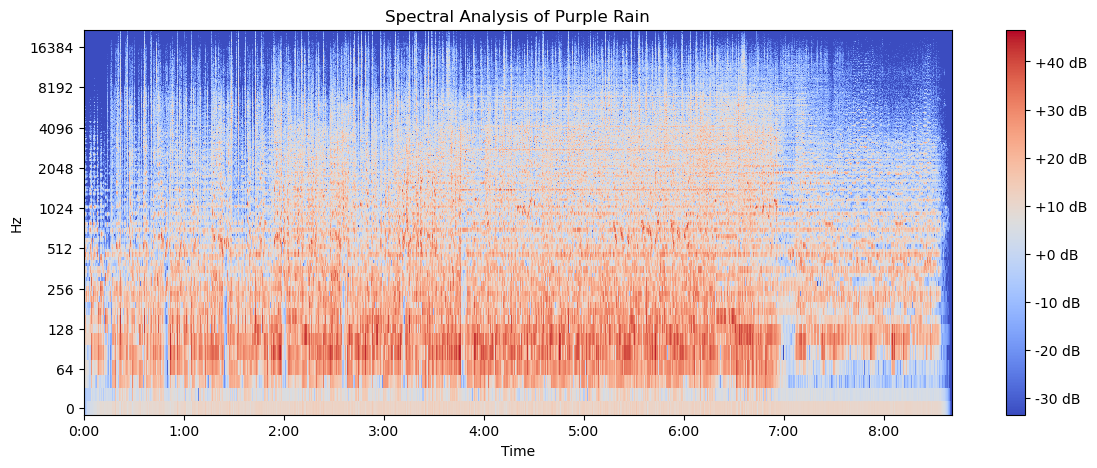

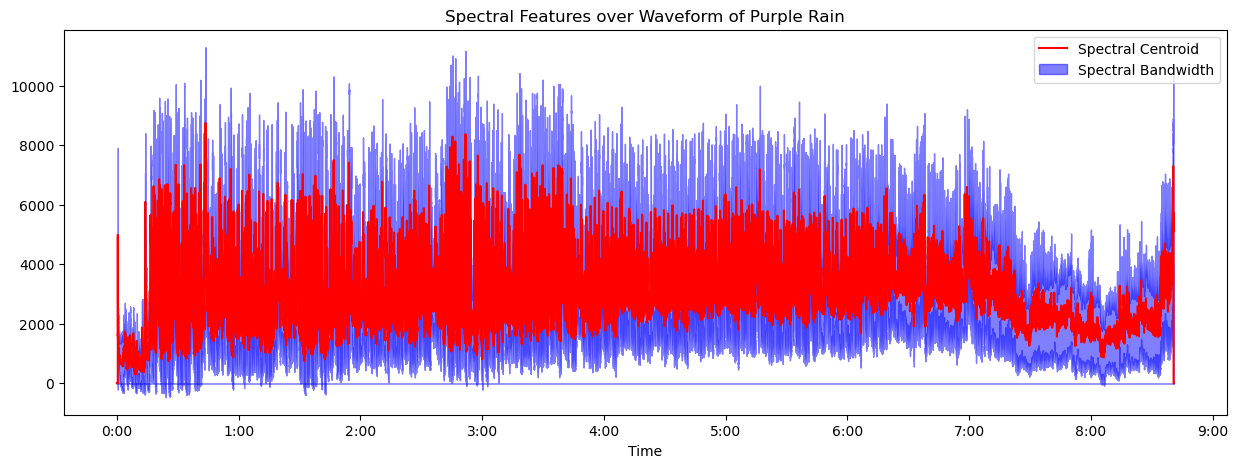

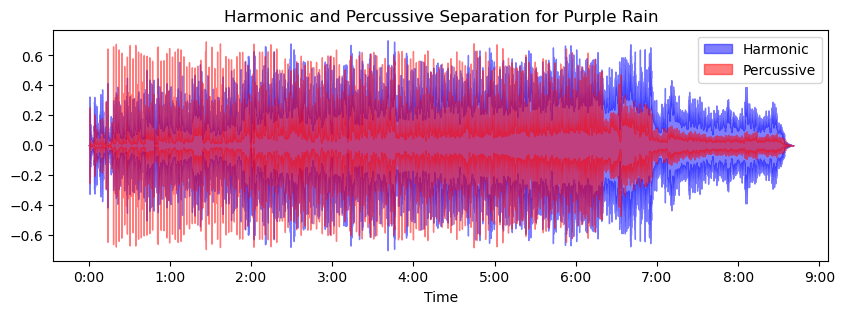

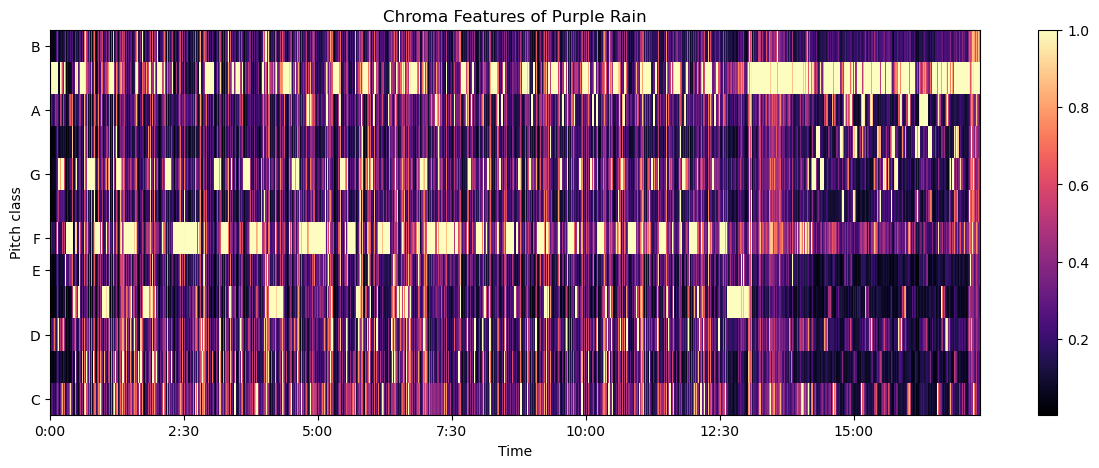

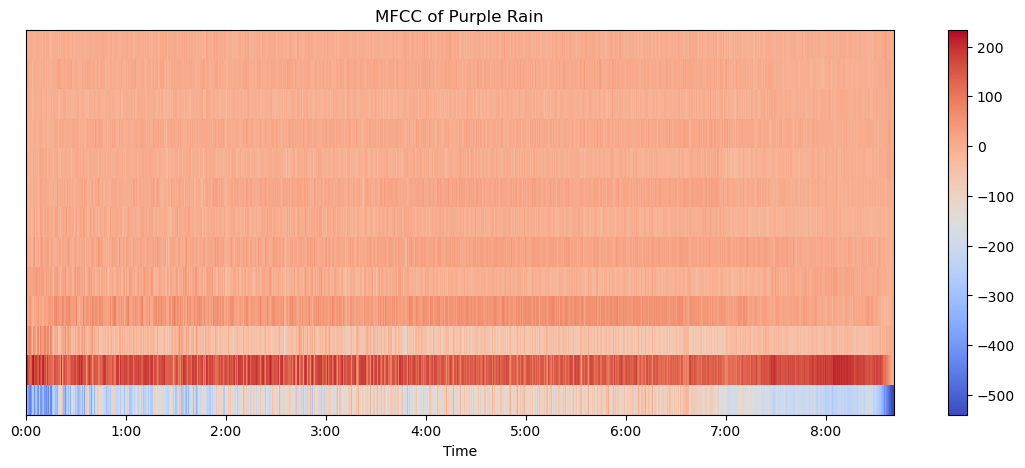

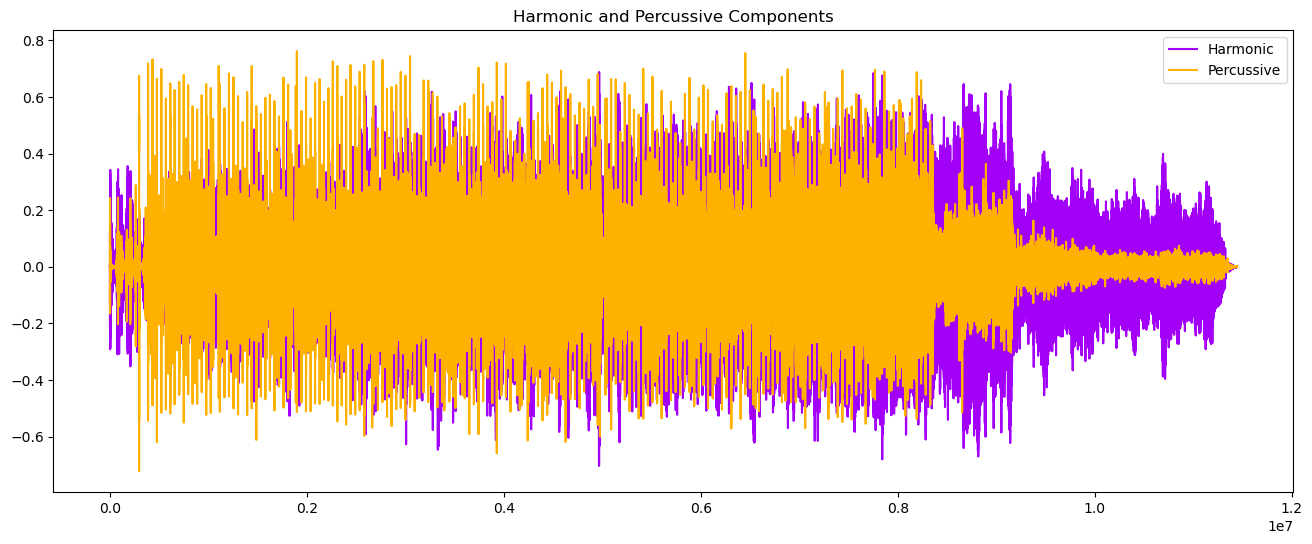

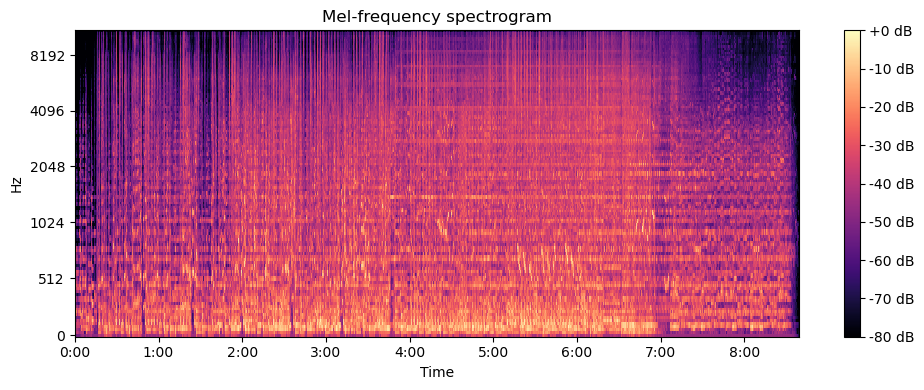

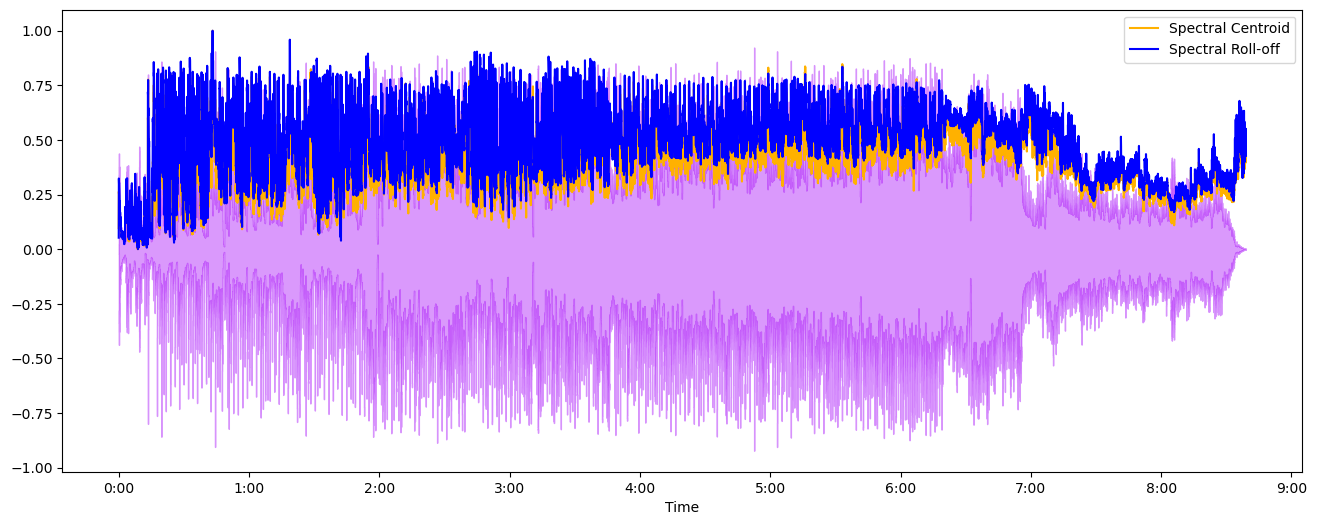

c:\ProgramData\Anaconda3\envs\ml\Lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
c:\ProgramData\Anaconda3\envs\ml\Lib\site-packages\sklearn\preprocessing\_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


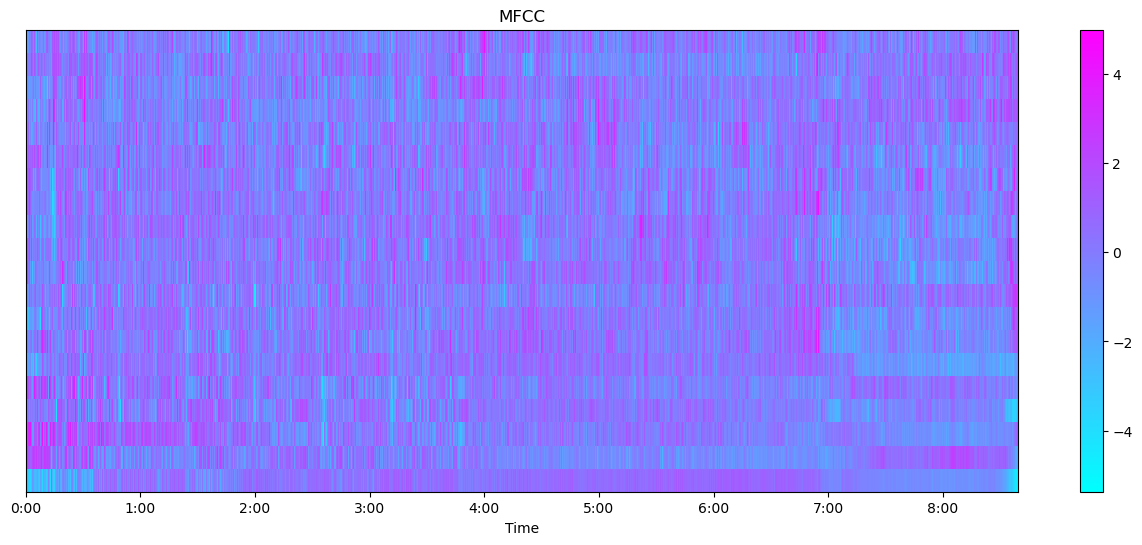

c:\ProgramData\Anaconda3\envs\ml\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,705,930 (14.14 MB)

 Trainable params: 3,705,930 (14.14 MB)

 Non-trainable params: 0 (0.00 B)

None


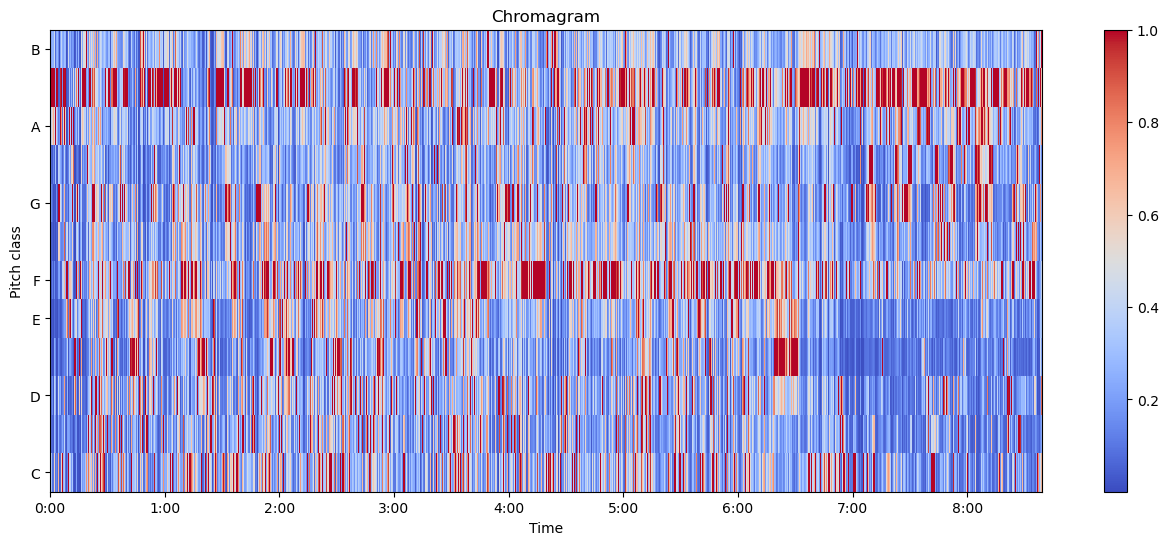

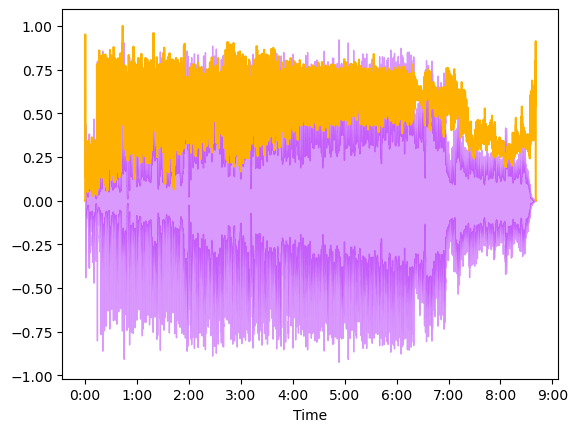

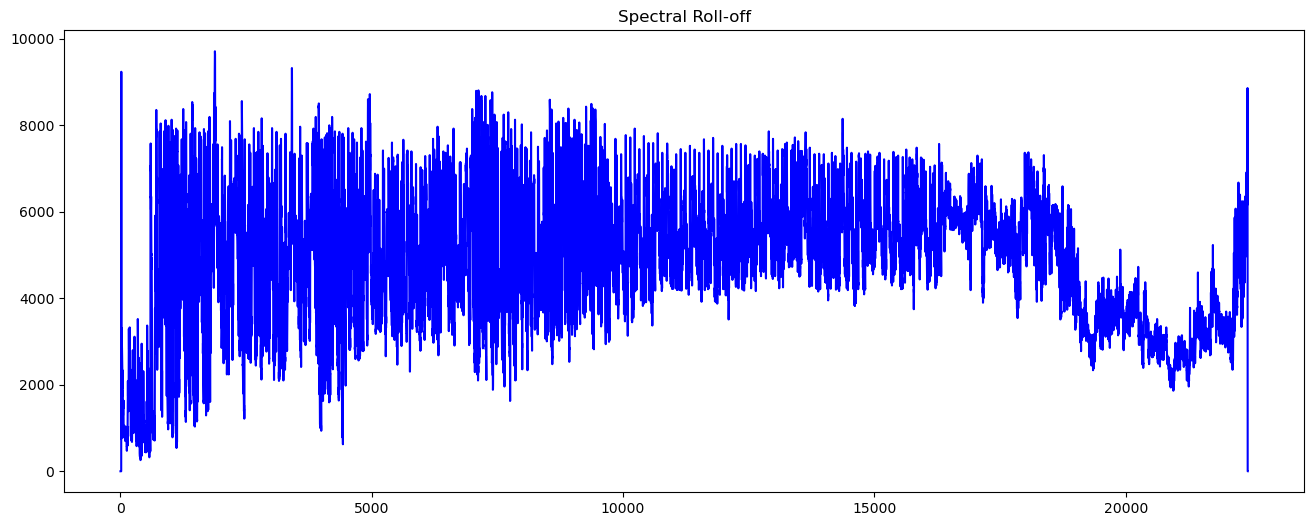

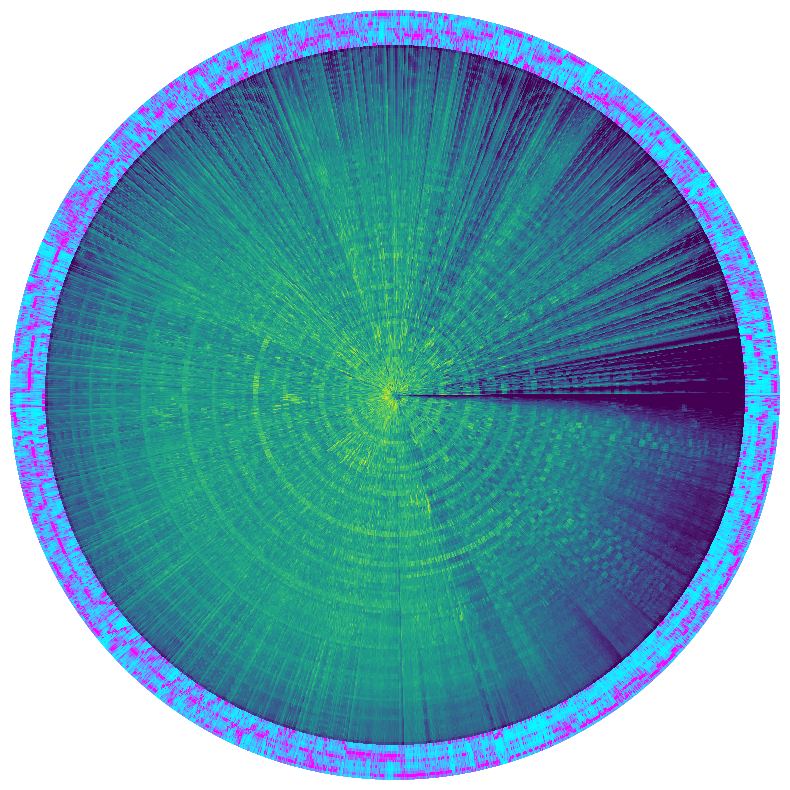

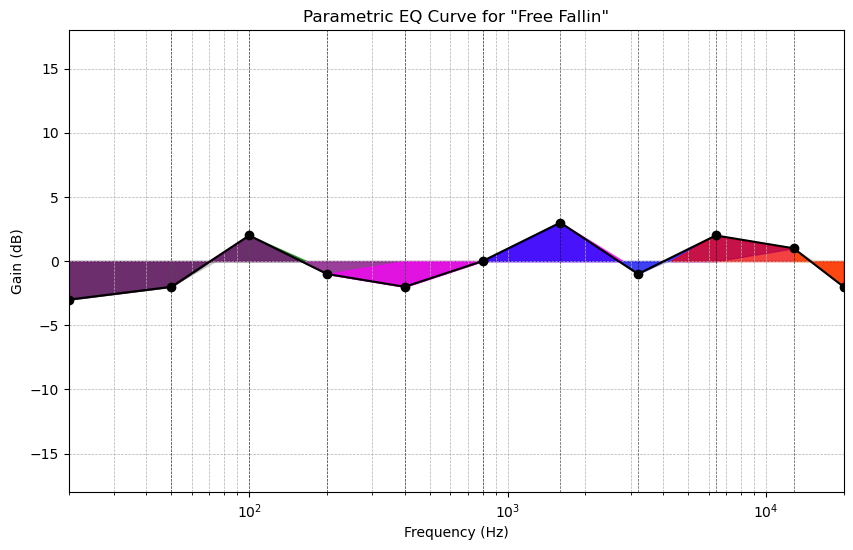

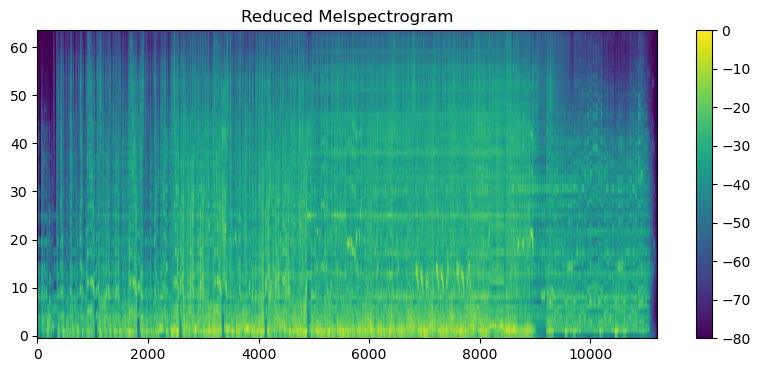

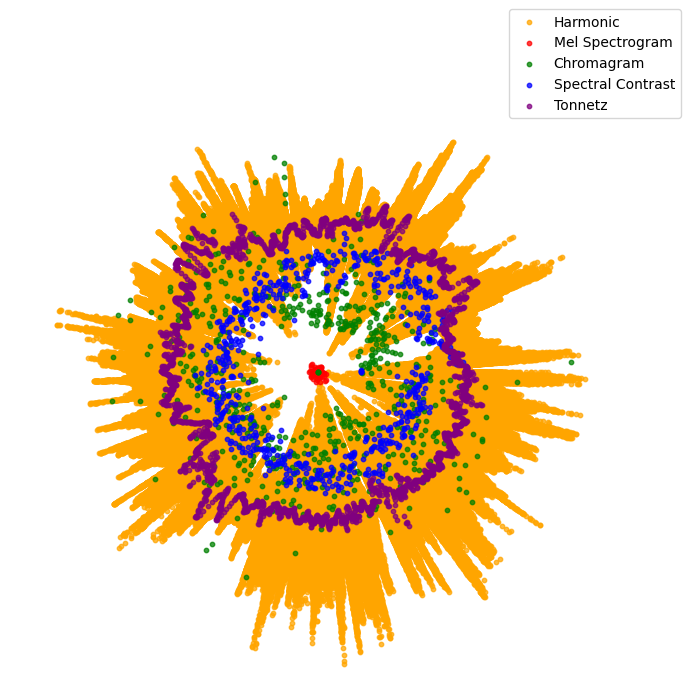

Audio File: [ 0.          0.          0.         ... -0.00061406 -0.01219668
  0.01087289] 

Audio File shape: (1313784,)


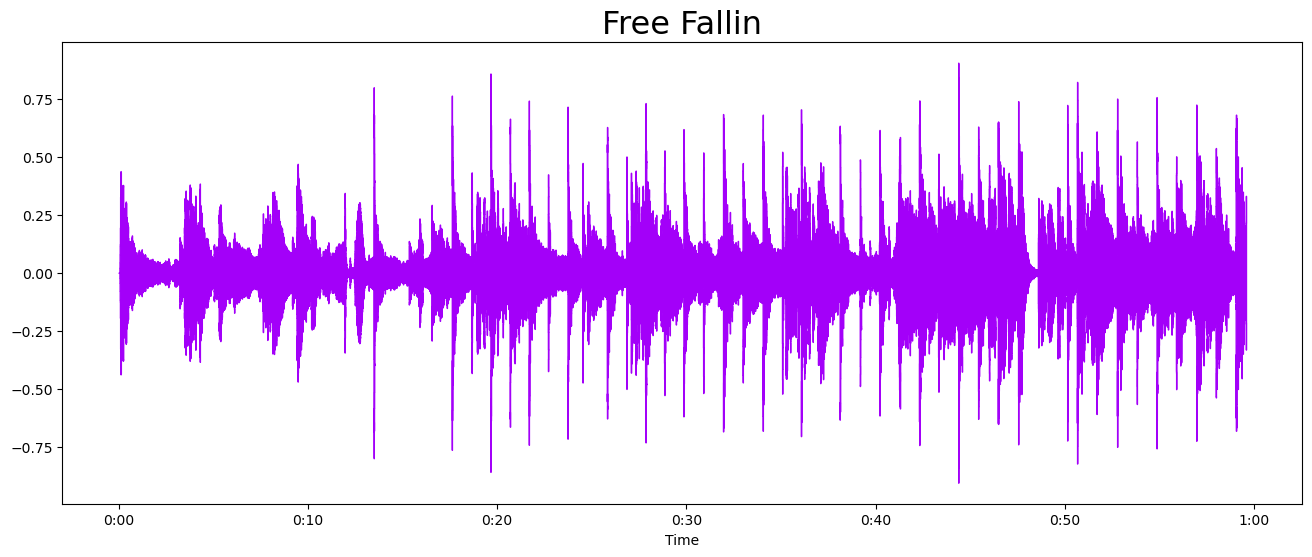

Shape of D object: (1025, 2566)


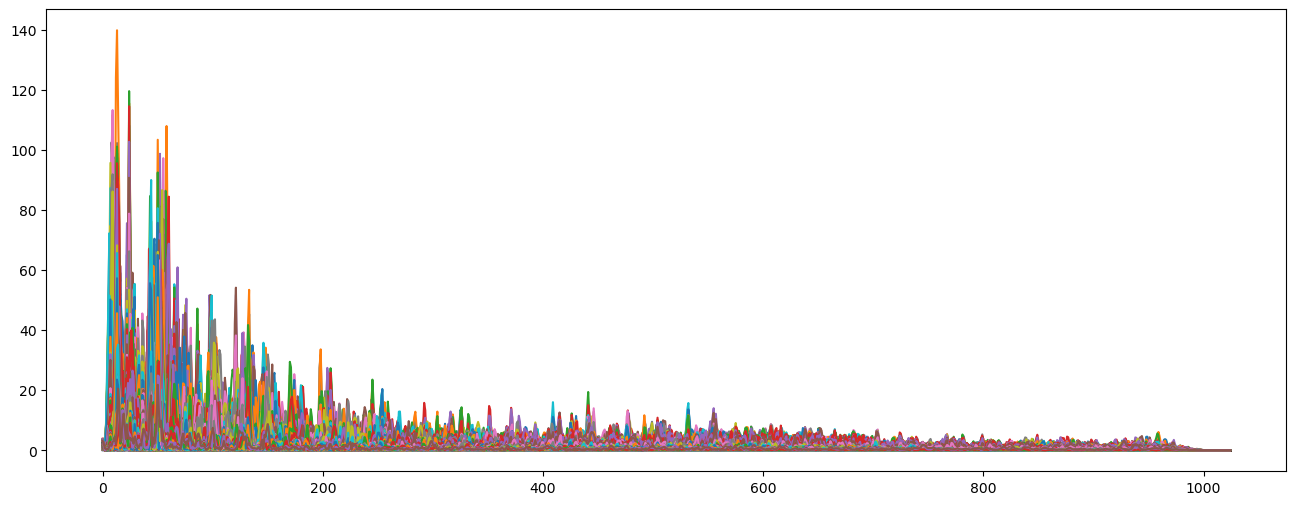

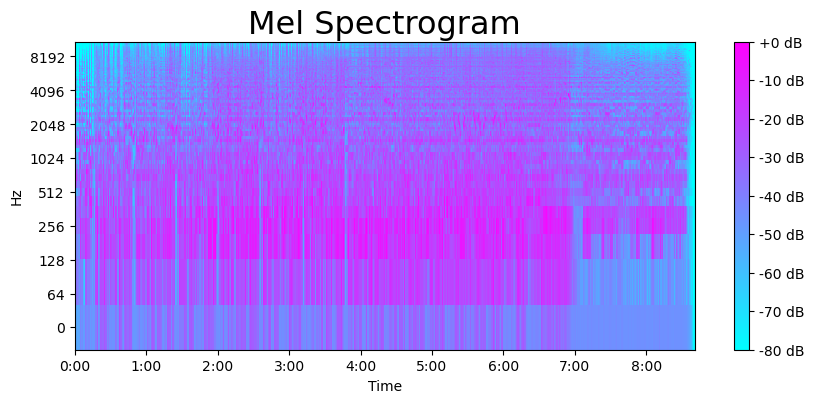

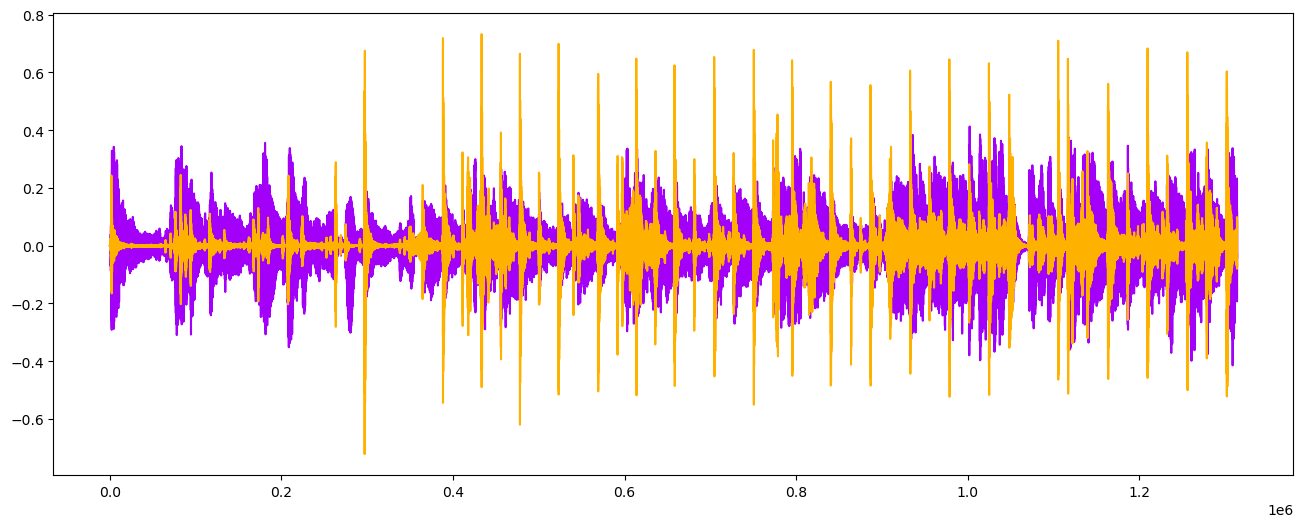

CSV file has been created with the following features:

   Spectral Centroid Mean  Spectral Centroid Variance  \
0             2788.123933                1.290150e+06   

   Spectral Bandwidth Mean  Spectral Bandwidth Variance  Harmonic Mean  \
0              3176.521325                 727782.02066      -0.000647   

   Harmonic Variance  Percussive Mean  Percussive Variance  MFCC 1 Mean  \
0           0.011172        -0.002803             0.001815  -151.836197   

   MFCC 1 Variance  ...  MFCC 9 Mean  MFCC 9 Variance  MFCC 10 Mean  \
0      7640.326172  ...    -3.235682        82.697403      5.922324   

   MFCC 10 Variance  MFCC 11 Mean  MFCC 11 Variance  MFCC 12 Mean  \
0          80.26339     -4.196476         63.863556      4.455205   

   MFCC 12 Variance  MFCC 13 Mean  MFCC 13 Variance  
0         69.409782      0.670831         55.529629  

[1 rows x 34 columns]


In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load "Purple Rain"
file_path_purple_rain = '09 Purple Rain.wav'
audio_purple_rain, sample_rate_purple_rain = librosa.load(file_path_purple_rain, sr=None)

# Perform a Short-Time Fourier Transform (STFT) to analyze the frequency content over time
stft_purple_rain = librosa.stft(audio_purple_rain)
db_stft_purple_rain = librosa.amplitude_to_db(abs(stft_purple_rain))

# Plot the spectrogram for a visual representation of the spectrum over time
plt.figure(figsize=(14, 5))
librosa.display.specshow(db_stft_purple_rain, sr=sample_rate_purple_rain, x_axis='time', y_axis='log', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectral Analysis of Purple Rain')
plt.show()

# Calculate the spectral centroid to measure the "center of mass" for the sound spectrum, indicating brightness
spectral_centroids_purple_rain = librosa.feature.spectral_centroid(y=audio_purple_rain, sr=sample_rate_purple_rain)[0]

# Calculate the spectral bandwidth, which reflects the width of the sound spectrum around the centroid
spectral_bandwidth_purple_rain = librosa.feature.spectral_bandwidth(y=audio_purple_rain, sr=sample_rate_purple_rain)[0]

# Convert frame counts to time to plot these spectral features
frames = range(len(spectral_centroids_purple_rain))
t_purple_rain = librosa.frames_to_time(frames, sr=sample_rate_purple_rain)

# Plot spectral features over the waveform for detailed analysis
plt.figure(figsize=(15, 5))
librosa.display.waveshow(audio_purple_rain, sr=sample_rate_purple_rain, alpha=0.4, color="blue")
plt.plot(t_purple_rain, spectral_centroids_purple_rain, color='r', label='Spectral Centroid')
plt.fill_between(t_purple_rain, spectral_centroids_purple_rain - spectral_bandwidth_purple_rain / 2,
                 spectral_centroids_purple_rain + spectral_bandwidth_purple_rain / 2, color='b', alpha=0.5, label='Spectral Bandwidth')
plt.legend(loc='upper right')
plt.title('Spectral Features over Waveform of Purple Rain')
plt.show()

# Harmonic and Percussive component separation
y_harm_purple_rain, y_perc_purple_rain = librosa.effects.hpss(audio_purple_rain)
plt.figure(figsize=(10, 3))
librosa.display.waveshow(y_harm_purple_rain, sr=sample_rate_purple_rain, alpha=0.5, color='b', label='Harmonic')
librosa.display.waveshow(y_perc_purple_rain, sr=sample_rate_purple_rain, alpha=0.5, color='r', label='Percussive')
plt.legend(loc='upper right')
plt.title('Harmonic and Percussive Separation for Purple Rain')
plt.show()

# Chroma Feature Extraction to analyze the musical tones involved
chroma_purple_rain = librosa.feature.chroma_cqt(y=audio_purple_rain, sr=sample_rate_purple_rain)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma_purple_rain, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chroma Features of Purple Rain')
plt.show()

# Calculate and plot Mel-Frequency Cepstral Coefficients (MFCCs) to capture timbral aspects
mfccs_purple_rain = librosa.feature.mfcc(y=audio_purple_rain, sr=sample_rate_purple_rain, n_mfcc=13)
plt.figure(figsize=(14, 5))
librosa.display.specshow(mfccs_purple_rain, sr=sample_rate_purple_rain, x_axis='time')
plt.colorbar()
plt.title('MFCC of Purple Rain')
plt.show()




import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale, minmax_scale
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load the audio file
y, sr = librosa.load('09 Purple Rain.wav')

# Trim silence from the beginning and end
y, _ = librosa.effects.trim(y)

# Harmonic and Percussive separation
y_harm, y_perc = librosa.effects.hpss(y)
plt.figure(figsize=(16, 6))
plt.plot(y_harm, color='#A300F9', label='Harmonic')
plt.plot(y_perc, color='#FFB100', label='Percussive')
plt.legend()
plt.title('Harmonic and Percussive Components')
plt.show()

# Calculate the Mel-scaled spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.power_to_db(S, ref=np.max)

# Plot the Mel-frequency spectrogram
plt.figure(figsize=(10, 4))
mappable = librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(mappable, format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

# Calculate Spectral Centroid and Spectral Roll-off
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=sr)

# Normalize and plot Spectral Centroid and Roll-off
normalized_centroids = minmax_scale(spectral_centroids, axis=0)
normalized_rolloff = minmax_scale(spectral_rolloff, axis=0)
plt.figure(figsize=(16, 6))
librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#A300F9')
plt.plot(t, normalized_centroids, color='#FFB100', label='Spectral Centroid')
plt.plot(t, normalized_rolloff, color='b', label='Spectral Roll-off')
plt.legend()
plt.show()

# Calculate MFCCs and plot
mfccs = librosa.feature.mfcc(y=y, sr=sr)
mfccs_scaled = scale(mfccs, axis=1)  # Scale MFCCs across the feature axis
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs_scaled, sr=sr, x_axis='time', cmap='cool')
plt.colorbar()
plt.title('MFCC')
plt.show()

# Define a deep learning model architecture for genre classification
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

# Calculate Chromagram and plot
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=512)
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=512, cmap='coolwarm')
plt.colorbar()
plt.title('Chromagram')
plt.show()




import librosa
import librosa.display
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale  # Importing the minmax_scale function

# Load your audio file
y, sr = librosa.load('09 Purple Rain.wav')

# Calculate spectral rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

# Time variable for plotting, assuming the correct definition of 't'
t = librosa.frames_to_time(range(len(spectral_rolloff)), sr=sr)

# Define a normalization function that uses sklearn's minmax_scale
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

# Normalize the spectral rolloff for plotting
normalized_rolloff = normalize(spectral_rolloff)

# Display the waveform and the normalized spectral rolloff
librosa.display.waveshow(y, sr=sr, alpha=0.4, color='#A300F9')
plt.plot(t, normalized_rolloff, color='#FFB100')
plt.show()


# Spectral Rolloff

# Calculate the Spectral Roll-off using keyword arguments
spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)[0]

# The plot
plt.figure(figsize=(16, 6))
plt.plot(spectral_rolloff, color='b')
plt.title('Spectral Roll-off')
plt.show()






# Load the audio file
y, sr = librosa.load('09 Purple Rain.wav')

# Extract features
spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr)

# Setup for plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10), subplot_kw={'projection': 'polar'})
ax.axis('off')

# Setup mesh for spectrogram
theta = np.linspace(0, 2*np.pi, spectrogram_db.shape[1] + 1)
r = np.linspace(0, 1, spectrogram_db.shape[0] + 1)
theta, r = np.meshgrid(theta, r)
ax.pcolormesh(theta, r, spectrogram_db, shading='flat')

# Setup mesh for chromagram
chroma_theta = np.linspace(0, 2*np.pi, chromagram.shape[1] + 1)
chroma_r = np.linspace(1, 1.1, chromagram.shape[0] + 1)
chroma_theta, chroma_r = np.meshgrid(chroma_theta, chroma_r)
ax.pcolormesh(chroma_theta, chroma_r, chromagram, shading='flat', cmap='cool')

plt.show()










# Frequency bands in Hz (mock values)
frequencies = np.array([20, 50, 100, 200, 400, 800, 1600, 3200, 6400, 12800, 20000])
# Gain values for each band in dB (mock values)
gains = np.array([-3, -2, 2, -1, -2, 0, 3, -1, 2, 1, -2])

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting the parametric EQ curve
plt.semilogx(frequencies, gains, marker='o', linestyle='-', color='black')

# Adding color coded areas for different filters
plt.fill_between(frequencies, gains, where=gains>0, interpolate=True, color='grey', alpha=0.3)
plt.fill_between(frequencies, gains, where=gains<=0, interpolate=True, color='grey', alpha=0.3)

# Highlight specific EQ bands with colors
colors = ['green', 'yellow', 'purple', 'fuchsia', 'blue', 'red']
filters = [(20, 100), (10000, 20000), (20, 400), (400, 1600), (1600, 6400), (6400, 20000)]
for (low_cut, high_cut), color in zip(filters, colors):
    plt.fill_between(frequencies, gains, where=(frequencies >= low_cut) & (frequencies <= high_cut), interpolate=True, color=color, alpha=0.7)

# Setting the x-axis limits to the audible range
plt.xlim(20, 20000)

# Setting the y-axis limits to the dB range of the EQ
plt.ylim(-18, 18)

# Labels and grid
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain (dB)')
plt.title('Parametric EQ Curve for "Free Fallin"')
plt.grid(True, which="both", ls="--", linewidth=0.5)

# Adding key frequency markers
for freq in frequencies:
    plt.axvline(x=freq, color='k', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.show()










# Extract features
melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=64, hop_length=1024)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=1024)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=1024)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
harmonic, percussive = librosa.effects.hpss(y)

# Convert to decibels for the melspectrogram
melspectrogram_db = librosa.power_to_db(melspectrogram, ref=np.max)

# Normalize and prepare for padding
features = [melspectrogram_db, chromagram, spectral_contrast, tonnetz, harmonic]
features_padded = []

for f in features:
    # Check if the feature is 1D or 2D and apply appropriate padding
    if f.ndim == 1:
        # It's a 1D array
        padded = np.pad(f, (0, max(0, 500 - f.shape[0])), mode='constant', constant_values=0)
        padded = padded[np.newaxis, :]  # Make it 2D by adding an axis
    else:
        # It's a 2D array
        padded = np.pad(f, ((0, 0), (0, max(0, 500 - f.shape[1]))), mode='constant', constant_values=0)
    
    features_padded.append(padded)

# Visualizing a portion to manage memory
plt.figure(figsize=(10, 4))
plt.imshow(features_padded[0], aspect='auto', origin='lower')
plt.title('Reduced Melspectrogram')
plt.colorbar()
plt.show()








# Load a segment of the audio file
y, sr = librosa.load('09 Purple Rain.wav', sr=22050, duration=60)  # Load only the first 60 seconds

# Extract features
melspectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=32, hop_length=2048)
chromagram = librosa.feature.chroma_stft(y=y, sr=sr, hop_length=2048)
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr, hop_length=2048)
tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
harmonic, percussive = librosa.effects.hpss(y)

# Normalize the features to a common scale
features = [harmonic, melspectrogram, chromagram, spectral_contrast, tonnetz]  # Place harmonic first
feature_names = ['Harmonic', 'Mel Spectrogram', 'Chromagram', 'Spectral Contrast', 'Tonnetz']
colors = ['orange', 'red', 'green', 'blue', 'purple']  # Corresponding colors, with harmonic's color first

normalized_features = []

for feature in features:
    # Scale features to be between 0 and 1
    min_val = np.min(feature)
    max_val = np.max(feature)
    scaled_feature = (feature - min_val) / (max_val - min_val)
    normalized_features.append(scaled_feature)

# Create a polar plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw={'projection': 'polar'})

# Plot each normalized feature in the same subplot with different colors
for feature, name, color in zip(normalized_features, feature_names, colors):
    # Collapse feature dimensions if necessary
    if feature.ndim > 1:
        feature = np.mean(feature, axis=0)
    
    # Map to polar coordinates
    theta = np.linspace(0, 2 * np.pi, feature.size)
    r = feature
    
    ax.scatter(theta, r, alpha=0.75, s=10, label=name, color=color)  # Use smaller dots with some transparency

# Customize the plot - removing labels, ticks, and spines
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.yaxis.set_ticks([])

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show the plot
plt.show()























# Trim leading and trailing silence from an audio signal (silence before and after the actual audio)
audio_file, _ = librosa.effects.trim(y)

# the result is an numpy ndarray
print('Audio File:', audio_file, '\n')


print('Audio File shape:', np.shape(audio_file))



plt.figure(figsize = (16, 6))


librosa.display.waveshow(y = audio_file, sr = sr, color = "#A300F9");
plt.title("Free Fallin", fontsize = 23);
plt.show()







# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(audio_file, n_fft = n_fft, hop_length = hop_length))

print('Shape of D object:', np.shape(D))

plt.figure(figsize = (16, 6))

plt.plot(D);
plt.show()



import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load an audio file
y, sr = librosa.load('09 Purple Rain.wav')

# Compute Mel spectrogram using keyword arguments explicitly
S = librosa.feature.melspectrogram(y=y, sr=sr)  # Notice y=y and sr=sr are now explicitly named

# Convert to log scale (dB)
S_DB = librosa.power_to_db(S, ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='log', cmap='cool')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram", fontsize=23)
plt.show()



y_harm, y_perc = librosa.effects.hpss(audio_file)

plt.figure(figsize = (16, 6))


plt.plot(y_harm, color = '#A300F9');
plt.plot(y_perc, color = '#FFB100');
plt.show()


import librosa
import pandas as pd
import numpy as np

# Load the audio file
file_path = '09 Purple Rain.wav'
audio, sr = librosa.load(file_path, sr=None)

# Calculate the Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)

# Calculate the Spectral Bandwidth
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=audio, sr=sr)

# Calculate Harmonic and Percussive components
y_harmonic, y_percussive = librosa.effects.hpss(audio)

# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)

# Calculate statistics for each feature
features = {
    'Spectral Centroid Mean': np.mean(spectral_centroids),
    'Spectral Centroid Variance': np.var(spectral_centroids),
    'Spectral Bandwidth Mean': np.mean(spectral_bandwidth),
    'Spectral Bandwidth Variance': np.var(spectral_bandwidth),
    'Harmonic Mean': np.mean(y_harmonic),
    'Harmonic Variance': np.var(y_harmonic),
    'Percussive Mean': np.mean(y_percussive),
    'Percussive Variance': np.var(y_percussive),
}

# Add MFCCs
for i, mfcc in enumerate(mfccs, 1):
    features[f'MFCC {i} Mean'] = np.mean(mfcc)
    features[f'MFCC {i} Variance'] = np.var(mfcc)

# Create a DataFrame
df_features = pd.DataFrame([features])

# Save to CSV
df_features.to_csv('audio_features_purple_rain.csv', index=False)
print("CSV file has been created with the following features:\n")
print(df_features.head())




In [4]:
# # You might need to install nbformat and nbconvert if not already installed
# # pip install nbformat nbconvert

# import nbformat
# from nbconvert import HTMLExporter

# # Load your notebook
# with open('purple_rain,ipynb', 'r', encoding='utf-8') as f:
#     nb = nbformat.read(f, as_version=4)

# # Setup a HTML exporter and convert the notebook
# html_exporter = HTMLExporter()A
# html_exporter.template_name = 'classic'

# (body, resources) = html_exporter.from_notebook_node(nb)

# # Write the output HTML file
# with open('purple_rain.html', 'w', encoding='utf-8') as f:
#     f.write(body)
